## Part I.   OpenCV, Preprocessing, Face Detection
## Part II.  Train CNN to detect facial keypoints
## Part III. Combine Part I and Part II to identify keypoints on any images

In [907]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2                     # OpenCV library for computer vision
from PIL import Image
import time
import utils.data as ud
import utils.visualize as vis

In [908]:
X_total, Y_total = ud.load_data_with_image_in_1D()

In [911]:
X_total[0]

array([ 0.93333333,  0.9254902 ,  0.92941176, ...,  0.2745098 ,
        0.29411765,  0.35294118])

* 1681 옆으로 기운 사진, 2021 옆모습
* 1928 블러하니까 눈이 인식됨

1809


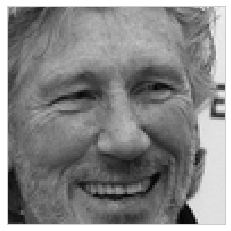

In [747]:
import random
idx = random.randint(0, X_total.shape[0])
# idx = 1681
print(idx)
img_raw = (X_total[idx]*255).astype(int)
face = Image.new("RGB", (96, 96), "black") 
pixels = face.load()
for i in range(face.size[0]):
    for j in range(face.size[1]):
        pixels[i,j] = (img_raw[i+j*96], img_raw[i+j*96], img_raw[i+j*96])
fig = plt.figure(figsize = (4,4))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(face, cmap='gray')

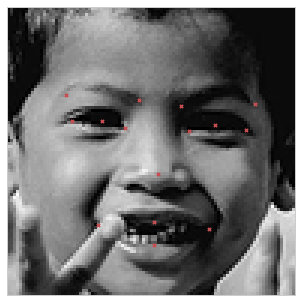

In [728]:
vis.show_keypoints_on_data(X_total[idx:idx+1], Y_total[idx:idx+1], (4, 4))

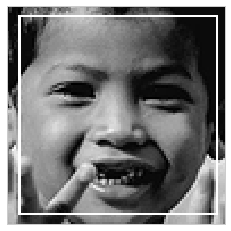

In [729]:
face_classifier = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
gray = np.array(face)[:, :, ::-1].copy()
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
image_with_detections = np.copy(gray)
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (255,0,0), 1)
fig = plt.figure(figsize = (4,4))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(image_with_detections, cmap='gray')

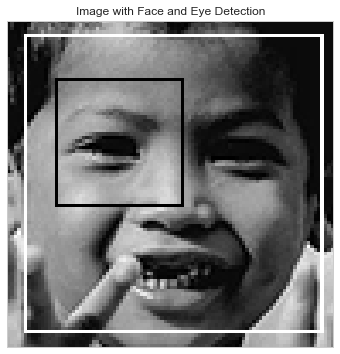

In [730]:
image_with_detections = np.copy(gray)   
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections, (x,y), (x+w,y+h),(255,0,0), 1)  
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, 1.2, 6)
for (x,y,w,h) in eyes:
    for (x1,y1,w1,h1) in faces:
        if x >= x1 and x+w <= x1+w1 and y >= y1 and y+h <= y1+h1: 
            cv2.rectangle(image_with_detections, (x,y), (x+w,y+h), (0,255,0), 1)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections, cmap='gray')

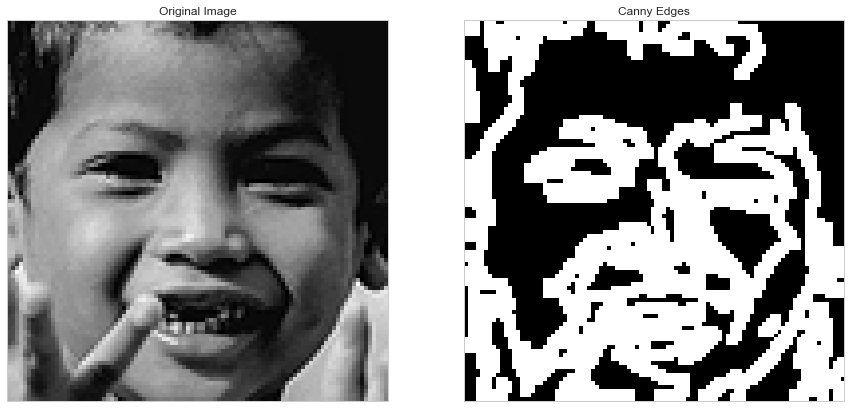

In [731]:
edges = cv2.Canny(gray,100,200)
# Dilate the image to amplify edges
edges = cv2.dilate(edges, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Original Image')
ax1.imshow(face)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges, cmap='gray')

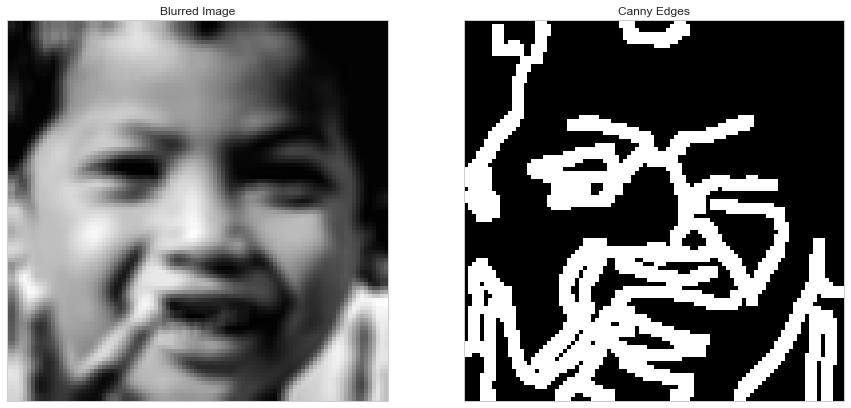

In [732]:
orig_img = np.copy(gray)
kernel = np.ones((4,4),np.float32)/16
blur = cv2.filter2D(orig_img,-1,kernel)

# Perform Canny edge detection on blurred image
edges_blur = cv2.Canny(blur,100,200)

# Dilate the image to amplify edges
edges_blur = cv2.dilate(edges_blur, None)

# Plot the RGB and edge-detected image
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Blurred Image')
ax1.imshow(blur, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_title('Canny Edges')
ax2.imshow(edges_blur, cmap='gray')

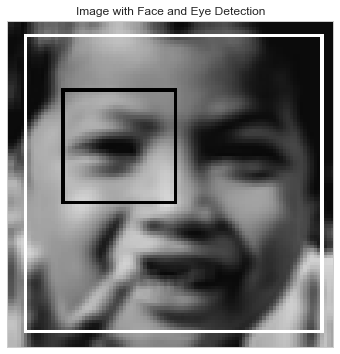

In [733]:
image_with_detections2 = np.copy(blur)   
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections2, (x,y), (x+w,y+h),(255,0,0), 1)  
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(blur, 1.2, 6)
for (x,y,w,h) in eyes:
    for (x1,y1,w1,h1) in faces:
        if x >= x1 and x+w <= x1+w1 and y >= y1 and y+h <= y1+h1: 
            cv2.rectangle(image_with_detections2, (x,y), (x+w,y+h), (0,255,0), 1)
fig = plt.figure(figsize = (6,6))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Image with Face and Eye Detection')
ax1.imshow(image_with_detections2, cmap='gray')